IMPORTING LIBRARIES

In [277]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [278]:
df = pd.read_csv('german_credit_data.csv')
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [279]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


In [280]:
df.describe()
df.drop(columns=['Unnamed: 0'], inplace=True)

In [281]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


In [282]:
df['Purpose'].unique()

array(['radio/TV', 'education', 'furniture/equipment', 'car', 'business',
       'domestic appliances', 'repairs', 'vacation/others'], dtype=object)

In [283]:
df.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

C:\Users\angel\AppData\Local\Temp\ipykernel_2880\1198055536.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Saving accounts', data=df, palette='Set2')


([0, 1, 2, 3],
 [Text(0, 0, 'little'),
  Text(1, 0, 'quite rich'),
  Text(2, 0, 'rich'),
  Text(3, 0, 'moderate')])

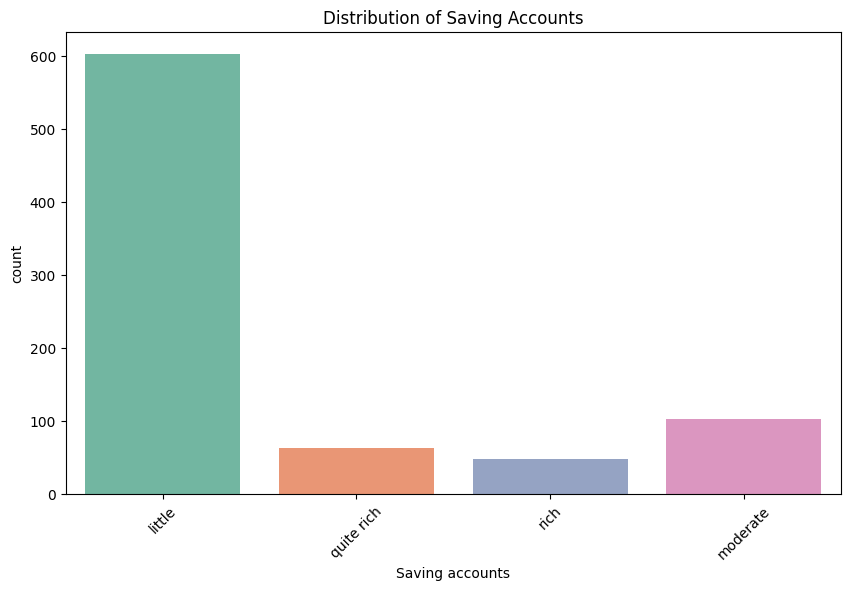

In [284]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Saving accounts', data=df, palette='Set2')
plt.title('Distribution of Saving Accounts')
plt.xticks(rotation=45)

C:\Users\angel\AppData\Local\Temp\ipykernel_2880\2645000210.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Checking account', data=df, palette='Set2')


([0, 1, 2], [Text(0, 0, 'little'), Text(1, 0, 'moderate'), Text(2, 0, 'rich')])

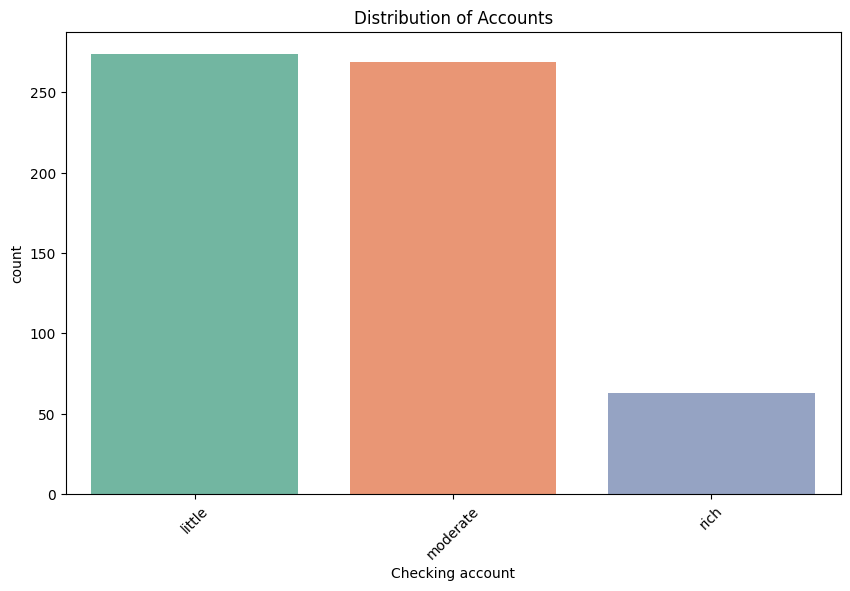

In [285]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Checking account', data=df, palette='Set2')
plt.title('Distribution of Accounts')
plt.xticks(rotation=45)

C:\Users\angel\AppData\Local\Temp\ipykernel_2880\3839598407.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Housing', data=df, palette='Set2')


([0, 1, 2], [Text(0, 0, 'own'), Text(1, 0, 'free'), Text(2, 0, 'rent')])

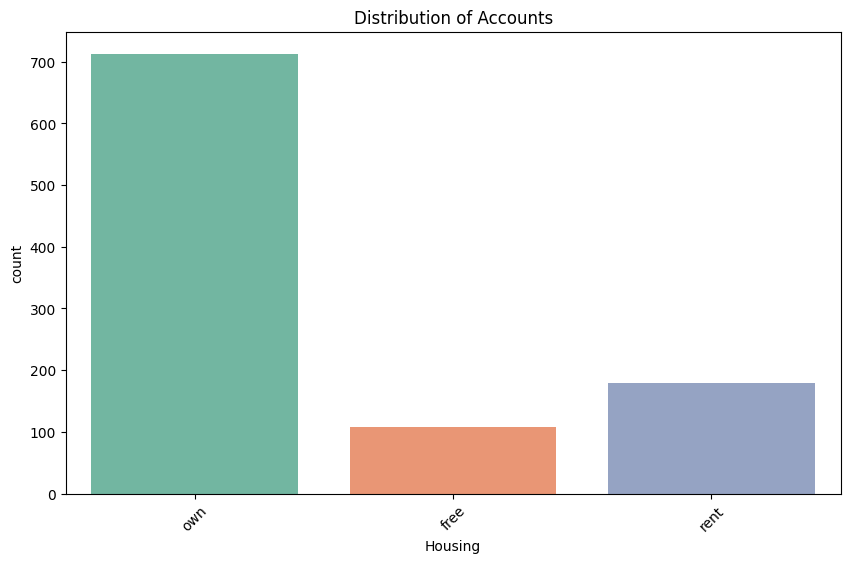

In [286]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Housing', data=df, palette='Set2')
plt.title('Distribution of Accounts')
plt.xticks(rotation=45)

C:\Users\angel\AppData\Local\Temp\ipykernel_2880\1275664414.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Purpose', data=df, palette='Set2')


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'radio/TV'),
  Text(1, 0, 'education'),
  Text(2, 0, 'furniture/equipment'),
  Text(3, 0, 'car'),
  Text(4, 0, 'business'),
  Text(5, 0, 'domestic appliances'),
  Text(6, 0, 'repairs'),
  Text(7, 0, 'vacation/others')])

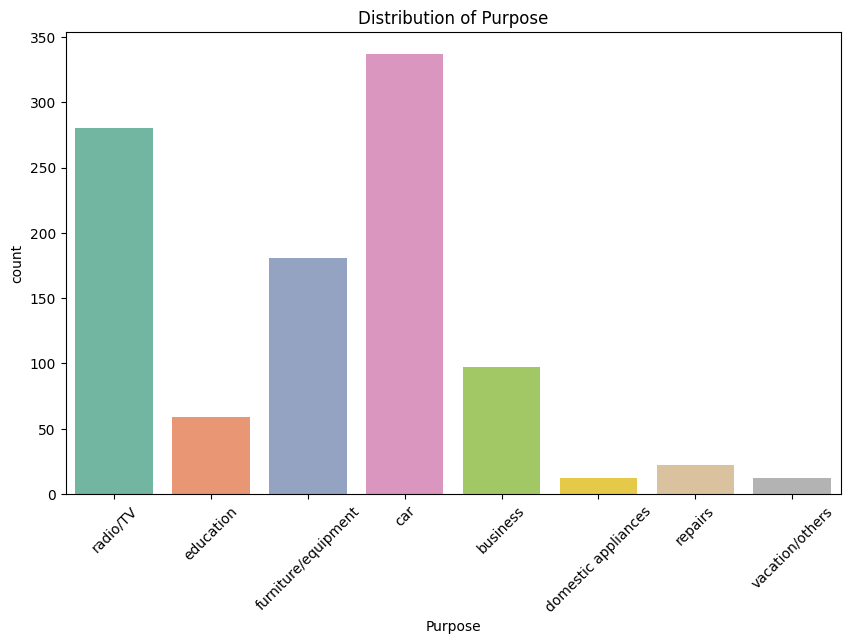

In [287]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Purpose', data=df, palette='Set2')
plt.title('Distribution of Purpose')
plt.xticks(rotation=45)

In [288]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Saving accounts'] = label_encoder.fit_transform(df['Saving accounts'])
df['Checking account'] = label_encoder.fit_transform(df['Checking account'])
df['Housing'] = label_encoder.fit_transform(df['Housing'])
df['Sex'] = label_encoder.fit_transform(df['Sex'])

In [289]:
frequency_encoding = df['Purpose'].value_counts().to_dict()
df['Purpose'] = df['Purpose'].map(frequency_encoding)

In [290]:
df.head(2)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,1,2,1,4,0,1169,6,280
1,22,0,2,1,0,1,5951,48,280


In [291]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Age               1000 non-null   int64
 1   Sex               1000 non-null   int64
 2   Job               1000 non-null   int64
 3   Housing           1000 non-null   int64
 4   Saving accounts   1000 non-null   int64
 5   Checking account  1000 non-null   int64
 6   Credit amount     1000 non-null   int64
 7   Duration          1000 non-null   int64
 8   Purpose           1000 non-null   int64
dtypes: int64(9)
memory usage: 70.4 KB


In [292]:
def check(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            print(f"Column '{col}' is categorical with {df[col].unique()} unique values.")
        else:
            print(f"Column '{col}' is numerical with {df[col].unique()} unique values.")
check(df)

Column 'Age' is numerical with [67 22 49 45 53 35 61 28 25 24 60 32 44 31 48 26 36 39 42 34 63 27 30 57
 33 37 58 23 29 52 50 46 51 41 40 66 47 56 54 20 21 38 70 65 74 68 43 55
 64 75 19 62 59] unique values.
Column 'Sex' is numerical with [1 0] unique values.
Column 'Job' is numerical with [2 1 3 0] unique values.
Column 'Housing' is numerical with [1 0 2] unique values.
Column 'Saving accounts' is numerical with [4 0 2 3 1] unique values.
Column 'Checking account' is numerical with [0 1 3 2] unique values.
Column 'Credit amount' is numerical with [ 1169  5951  2096  7882  4870  9055  2835  6948  3059  5234  1295  4308
  1567  1199  1403  1282  2424  8072 12579  3430  2134  2647  2241  1804
  2069  1374   426   409  2415  6836  1913  4020  5866  1264  1474  4746
  6110  2100  1225   458  2333  1158  6204  6187  6143  1393  2299  1352
  7228  2073  5965  1262  3378  2225   783  6468  9566  1961  6229  1391
  1537  1953 14421  3181  5190  2171  1007  1819  2394  8133   730  1164
  5954 

In [293]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [294]:
features = ['Age', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Credit amount', 'Duration', 'Purpose']
X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [295]:
kmeans = KMeans(n_clusters=2, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

In [296]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [297]:
df['Cluster'].value_counts()

Cluster
1    770
0    230
Name: count, dtype: int64

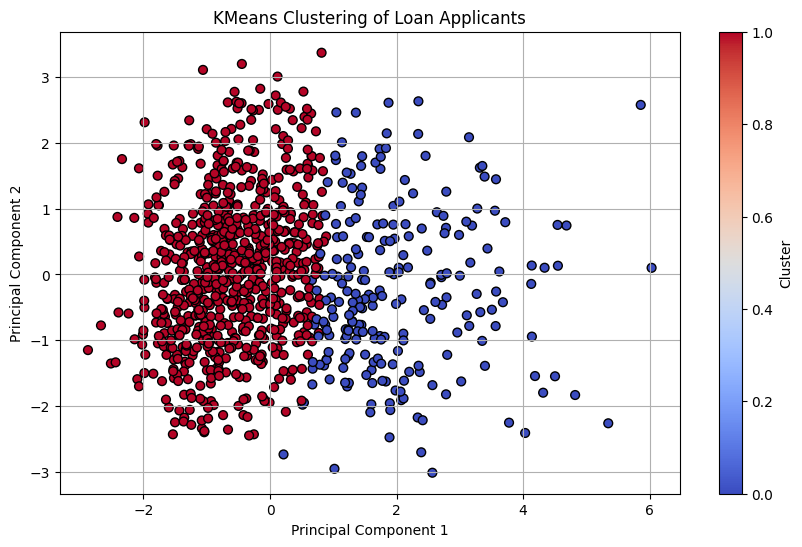

In [298]:
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='coolwarm', s=40, edgecolor='k')
plt.title("KMeans Clustering of Loan Applicants")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

In [299]:
cluster_to_risk = {
    0: "High Risk",
    1: "Low Risk"
}

df['Risk_Level'] = df['Cluster'].map(cluster_to_risk)

In [300]:
df.tail(5)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Cluster,Risk_Level
995,31,0,1,1,0,3,1736,12,181,1,Low Risk
996,40,1,3,1,0,0,3857,30,337,0,High Risk
997,38,1,2,1,0,3,804,12,280,1,Low Risk
998,23,1,2,0,0,0,1845,45,280,0,High Risk
999,27,1,2,1,1,1,4576,45,337,0,High Risk


In [301]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, roc_curve

In [302]:
features = df.drop(columns=['Risk_Level', 'Cluster'], axis = 1)
target = df['Cluster']

In [303]:
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE(random_state=42).fit_resample(features, target)

In [304]:
x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [305]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [306]:
y_pred = rf.predict(x_test)

In [307]:
confusion_matrix(y_test, y_pred)

array([[155,   1],
       [  5, 147]])

In [308]:
accuracy_score(y_test, y_pred)

0.9805194805194806

In [309]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(x_train, y_train)

C:\Users\angel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\training.py:183: UserWarning: [19:14:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [310]:
y_pred_xgb = xgb.predict(x_test)

In [311]:
accuracy_score(y_test, y_pred)

0.9805194805194806

In [312]:
import pickle
pickle.dump(rf, open('rf_model.pkl', 'wb'))

In [316]:
df.tail(5)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Cluster,Risk_Level
995,31,0,1,1,0,3,1736,12,181,1,Low Risk
996,40,1,3,1,0,0,3857,30,337,0,High Risk
997,38,1,2,1,0,3,804,12,280,1,Low Risk
998,23,1,2,0,0,0,1845,45,280,0,High Risk
999,27,1,2,1,1,1,4576,45,337,0,High Risk
